2025-07-30 16:42:44,102 - INFO - Ratings shape: (1000209, 11) | Clusters shape: (12080, 2)
/Users/gnaneshreddysaireddy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gnaneshreddysaireddy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gnaneshreddysaireddy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


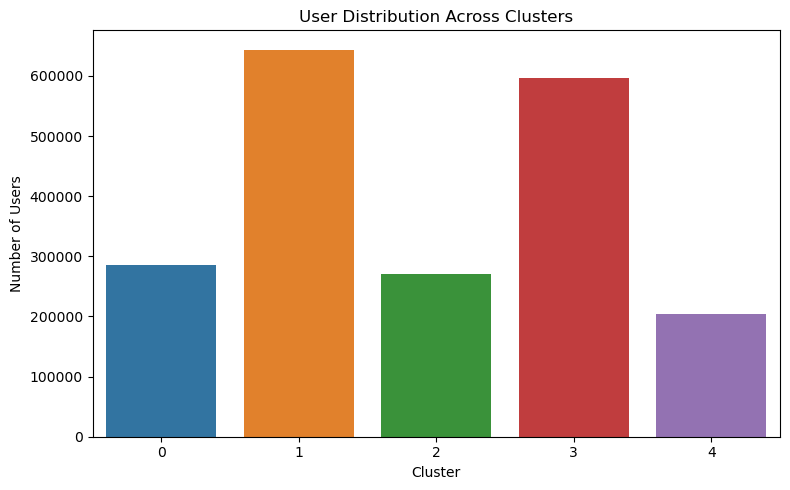

/Users/gnaneshreddysaireddy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gnaneshreddysaireddy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gnaneshreddysaireddy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gnaneshreddysaireddy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

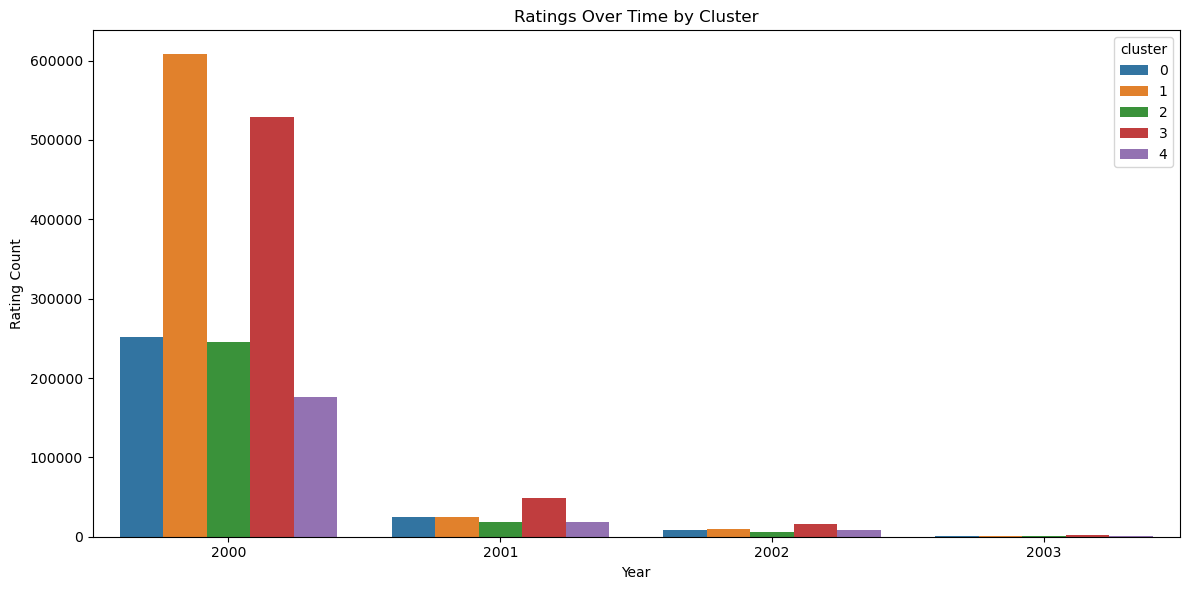

/Users/gnaneshreddysaireddy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gnaneshreddysaireddy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gnaneshreddysaireddy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gnaneshreddysaireddy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

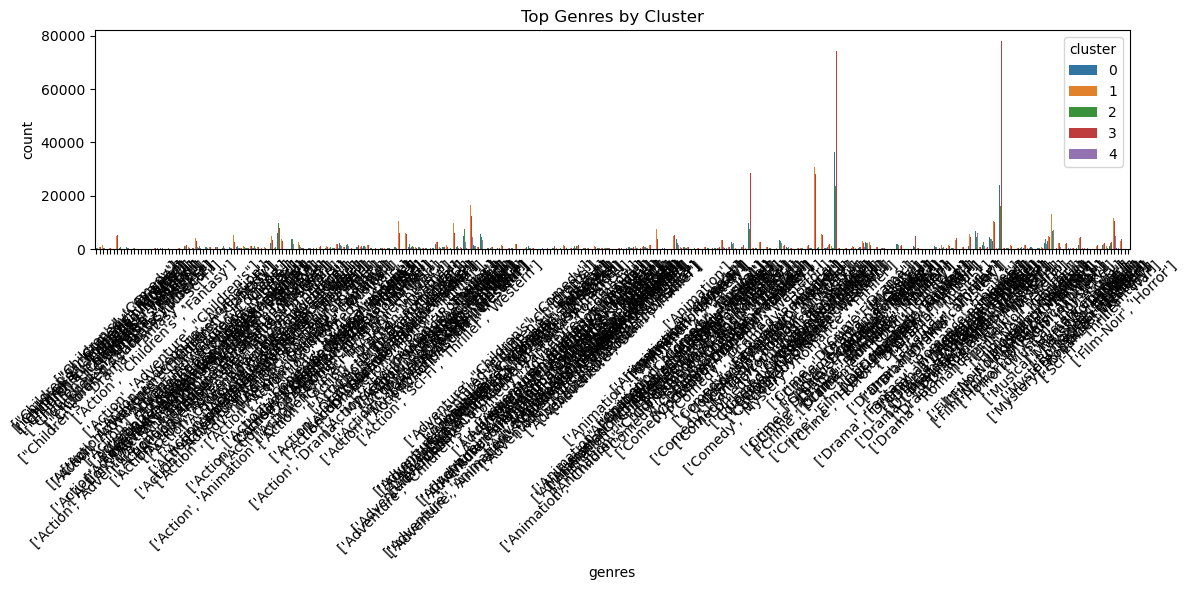

2025-07-30 16:42:53,619 - INFO - Dashboard visualizations complete.


In [1]:
# taste_drift_pipeline/notebooks/04_dashboard_reporting.ipynb

# --- Notebook 4: Dashboard & Visual Reporting ---

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from pathlib import Path
import sys

# Setup project path
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Configure logging
log_dir = project_root / "logs"
log_dir.mkdir(exist_ok=True)
log_file = log_dir / "dashboard.log"
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler(log_file),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

# Load data
ratings_path = project_root / "data/processed/ratings_with_time_split.csv"
clusters_path = project_root / "data/processed/user_clusters.csv"

ratings_df = pd.read_csv(ratings_path, parse_dates=['datetime'])
clusters_df = pd.read_csv(clusters_path)

logger.info(f"Ratings shape: {ratings_df.shape} | Clusters shape: {clusters_df.shape}")

# Merge cluster info
merged_df = ratings_df.merge(clusters_df, on="user_id", how="left")

# Plot cluster distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x="cluster", palette="tab10")
plt.title("User Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

# Taste drift over time by cluster
merged_df["year"] = merged_df["datetime"].dt.year
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x="year", hue="cluster", palette="tab10")
plt.title("Ratings Over Time by Cluster")
plt.xlabel("Year")
plt.ylabel("Rating Count")
plt.tight_layout()
plt.show()

# Genre preference by cluster
merged_df['genres'] = merged_df['genres'].str.split('|')
exploded = merged_df.explode('genres')
genre_cluster = exploded.groupby(['cluster', 'genres']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_cluster, x='genres', y='count', hue='cluster')
plt.title("Top Genres by Cluster")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

logger.info("Dashboard visualizations complete.")
